# Course #6 The complete Data Visualization Course, Excel, Tableau, Python, R

## 1.- Introduction

- List of charts to create and dataset to use:
    3. Bar chart - bar_chart_data.csv
    4. Pie chart - 
    5. Stacked Area chart -
    6. Line chart -
- Libraries to use Pandas, Matplotlib, Seaborn


In [ ]:
# Import required libraries
import pandas as pd                 # For data manipulation
import matplotlib.pyplot as plt     
import seaborn as sns               # Matplotli, Seaborn, and sns.set() for data visualization

print(pd.__version__)
print(sns.__version__)

sns.set()                           # Putting a beauty skin over Matplotlib

## 2.- Setting Up the Environments

## 3.- Bar chart

In [ ]:
# Read / import the data
df_used_cars = pd.read_csv('bar_chart_data.csv')
df_used_cars

In [ ]:
# Simple matplotlib bar chart
xy_size = 13
plt.figure(figsize=(10, 5))
plt.bar(x=df_used_cars['Brand'], height=df_used_cars['Cars Listings'],
        color='midnightblue')           # color='rgbwymc'  doesn't work 
plt.title('Used Cars Listing by Brand', fontsize=16, fontweight='bold')
plt.ylabel('Listing Cars', fontsize=xy_size)
plt.xticks(rotation=45, fontsize=xy_size)
plt.yticks(fontsize=xy_size)
plt.savefig('used_cars_bar_graph') 
plt.show()


## 4.- Pie chart

## 5.- Stacked Area chart

## 6.- Line chart

In [ ]:
# import/read data
df_spx_ftse_00_10 = pd.read_csv('6_line_chart_data.csv')
df_spx_ftse_00_10.iloc[[0, 9, -9, -1]]                      # Equiv to df[[0, 9, -9, -1], :]
# Date: only days with trading operations

In [ ]:
df_spx_ftse_00_10.info()
df_spx_ftse_00_10.Date.dtype    # Data must be datetime

In [ ]:
df_spx_ftse_00_10['dt_date'] = pd.to_datetime(df_spx_ftse_00_10.Date)
df_spx_ftse_00_10.iloc[[0, 9, -9, -1]] 

In [ ]:
# Line chart for the entire period (2000-2010)
xy_size = 13
ordered_cols = ['GSPC500', 'FTSE100' ]

plt.figure(figsize=(20, 8))
plt.plot(df_spx_ftse_00_10['dt_date'], df_spx_ftse_00_10[ordered_cols[0]])
plt.plot(df_spx_ftse_00_10['dt_date'], df_spx_ftse_00_10[ordered_cols[1]])
plt.title('S&P vs. FTSE Returns (2000 - 2010)', fontsize=14, weight='bold')
plt.ylabel('Returns', fontsize=xy_size)
plt.xlabel('Date', fontsize=xy_size)
plt.legend(labels = ordered_cols, fontsize=xy_size)
plt.show()

In [ ]:
# To plot a line chart for a narrow period. First select the period in a new df
df_spx_ftse_H2_08 = df_spx_ftse_00_10[(df_spx_ftse_00_10.dt_date >= '2008-07-01') &
                                       (df_spx_ftse_00_10.dt_date <= '2008-12-31')]
df_spx_ftse_H2_08

In [ ]:
# Line chart for the second half of 2008 (H2 2008)
xy_size = 13
ordered_cols = ['GSPC500', 'FTSE100' ]

plt.figure(figsize=(20, 8))
plt.plot(df_spx_ftse_H2_08['dt_date'], df_spx_ftse_H2_08[ordered_cols[0]], color='midnightblue')
plt.plot(df_spx_ftse_H2_08['dt_date'], df_spx_ftse_H2_08[ordered_cols[1]], color='crimson')
plt.title('S&P vs. FTSE Returns (H2 2008)', fontsize=14, weight='bold', loc='left')
plt.ylabel('Returns', fontsize=xy_size)
plt.xlabel('Date', fontsize=xy_size)
plt.legend(labels = ordered_cols, fontsize=xy_size)
#plt.xticks(df_spx_ftse_H2_08['dt_date'], rotation=90)
plt.show()

#### 6.- Line chart INTERPRETATION
- 2000 - 2010 prove to be a too long period to gain valuable insights. We can zoom in any period we are interested.
- Typical time frames: 1 day, 1 week, 1 month, 1 Year (x 12), 5 Years (5 x 12)
- We choose H2 2008 (Q3 and Q4 2008) specifically to observe the effect on our return values due to a specific phenomenon -> the housing market crisis, known as the great recession.
- (Details of the housing 2008 crash)
- We can see that up to Ag 2008, the returns are more or less stable. Aftir that point, we start seeing enormous swings in the data caused by the crash.
- We observe the same pattern for both the US (S&P) and the UK (FSET) market.

#### 6.- Line chart - WHAT MAKES A GOOD line chart.
- Are most frequently use when displaying time series data. Trough a LC it's easy to track the progression of a variable over time. 
- Moreover, a LC is also suitable for tracking several diff. vars on the same chart. (3, 5, or even 10 diff. vars over time)
- A LC is nothing but the tip of the area in an area chart  (Area charts and particularly Stacked arec charts are useful when we are interested to see parts of the whole. )
- Much more suitable when we have multiple categories.
- AVOID spaghetti chart, when having too many variables. - KEEP the charts simples.
- NOT necessary to start the y-axis at 0. (Edward Tufte: "In general, in a time series, use a baseline that shows the data, not the zero point")


## 7.- Histogram

### 7.- Introduction - General Theory
- Histograms:
    - Shows the distribution of a numeric value.
    - The variable's range of values is split in intervals, represented by diff. bins. (Ex. age intervals in a survey)
    - The height of the bin represent the number of observations within an interval.
- One of the easiest and most useful tools to understand numerical data.
- x-axis: intervals in ascending order. Whole y-axis is the frequency of occurrence (in y-axis has the number of observations - number of participants by each interval in the survey example)
- y-axis could be represented as a density function.
- x-axis [20, 25] - (25, 30] - (30, 35]. [: means Included. (means Excluded. Depending on the software, this precise interval division is the default option.
- Bar charts represents diff. categories and bars are separated, Histograms represent bins (intervals) and bins overlaps (bin: contenedor o bandeja).
> Choosing an appropriate number of bins is the most crucial aspect of creating a histogram.

### 7.- Introduction - Dataset
- Real Estate Property Listings in CA - Venturing into the world of real state.
- Features (vars, cols); ID, Area(ft.), Price in thousands of dollars (Price we'll concentrate on) and others.

In [ ]:
# import/read data
df_real_estate = pd.read_csv('7_histogram_data.csv')
df_real_estate.iloc[[0, 9, -9, -1]]         # Equiv to df[[0, 9, -9, -1], :

``` Python
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
```

In [ ]:
xy_size = 13
sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.hist(df_real_estate.Price, bins=8, color='#108A99') # density=True)
plt.title("CA Houses' Price Distribution", fontsize=xy_size + 2,  fontweight='bold')
plt.xlabel("Prices in thousands (000' $)")
plt.ylabel("Number of Houses")
sns.despine()
plt.show()


### 7.- Histogram - How to Choose the Right Number of bins
1. Start with a very large number to observe the data pattern. (ex. 50)
2. Reduce drastically the number. (ex. 2)
3. Choose several bins, such that the pattern in the data is visible (ex. 8, 9)
- There are scientific approaches (Scott's Rule, Sturgle's Rule, Doane's Rule), however, they are not often use in practice because real data has noise, is discrete, etc.

### 7.- Histogram - What Makes a Good Histogram
- Most important feature of a histogram: The Number of Bins or The interval Size.
- Sometimes the interval width can be deliberately altered. Without proper explanation, this might cause disinformation and be misleading to an audience.
- It´s highly recommended that you stick with the equal width intervals until you gain enough experience.
- AVOID Cutting the x or the y-axis. You should most definitely start your axis at 0 or make it extremely clear that you only want to include the real runners (by ex. of cutting x-axis) in your analysis.
- When to use a histogram?: When we have numerical data (not necessarily). However, qualitative data could be quantified. Ex. likert scales are very popular primary in surveys.

## 8.- Scatter Plot

### 8.- Scatter Plot - Introduction - General Theory
- A scatter plot shows the relationship between two numerical features (or vars).
- Te observations are displayed as points on the graph where the X coordinate is one of the vars (var1) while the y coordinate is the other var2.
- Advantage of being able to display a large number of points
- Each obs. is a point on the scatter. In previous charts (bar, pie, hist) obs. are grouped together so we never see each distinct data point instead the data es aggregated in some form.
- In scatter plot the data is NOT aggregated.
- Very USEFUL in DS:
    - They can reveal relationship like correlation within the features.
    - They show each data point (obs.) so we can easily see the concentration of observations and outliers in the data.
    - They are a vital part of the exploratory data process for many statistical models (ex. regression analysis)
> Use transparency to avoid overplotting - A third variable could be used (show) with a color parameter.

### 8.- Scatter Plot - Introduction - Dataset
- Real estate property listings in CA (same as in Histogram)
- In this case, we will create a scatter plot from the price and area features.

In [27]:
#import/read the data
df_r_state_2 = pd.read_csv('7_histogram_data.csv')
df_r_state_2.iloc[[0, 9, -9, -1]]

,ID,Building Type,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price
0,1030,1,2005.0,11.0,Apartment,30,743.09,246
9,4023,4,2006.0,3.0,Apartment,23,794.52,236
258,5037,5,NaN,NaN,Apartment,37,606.33,147
266,5051,5,NaN,NaN,Apartment,51,789.25,199


### 8.Matplotlib scatter()

<bound method PathCollection.legend_elements of <matplotlib.collections.PathCollection object at 0x0000023D9D4F0250>> <class 'method'>
([<matplotlib.lines.Line2D object at 0x0000023D9D4F09D0>, <matplotlib.lines.Line2D object at 0x0000023D9D511150>, <matplotlib.lines.Line2D object at 0x0000023D9D510A90>, <matplotlib.lines.Line2D object at 0x0000023D9D738390>, <matplotlib.lines.Line2D object at 0x0000023D9D512450>], ['$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$', '$\\mathdefault{4}$', '$\\mathdefault{5}$']) <class 'tuple'>


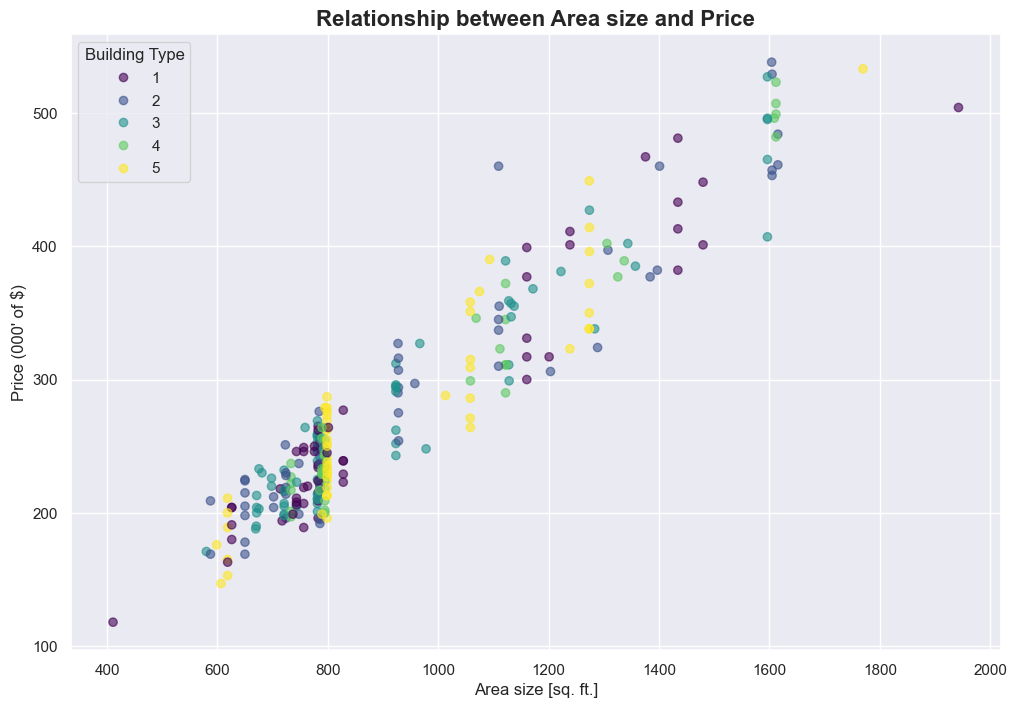

In [28]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df_r_state_2['Area (ft.)'],       # x-axis (var 1)
                      df_r_state_2['Price'],            # y-axis (var 2)
                      alpha=0.6,                        # Transparency
                      c=df_r_state_2['Building Type'],  # Third var colored
                      cmap='viridis')                   # Palette

plt.legend(*scatter.legend_elements(),      # * means unpacking
           loc='upper left',
           title='Building Type')
# jm - test
print(scatter.legend_elements, type(scatter.legend_elements))
print(scatter.legend_elements(), type(scatter.legend_elements()))

plt.title('Relationship between Area size and Price',
          fontsize=16, fontweight='bold')
plt.xlabel('Area size [sq. ft.]')
plt.ylabel("Price (000' of $)")
plt.show()


### 8.Seaborn Scatter

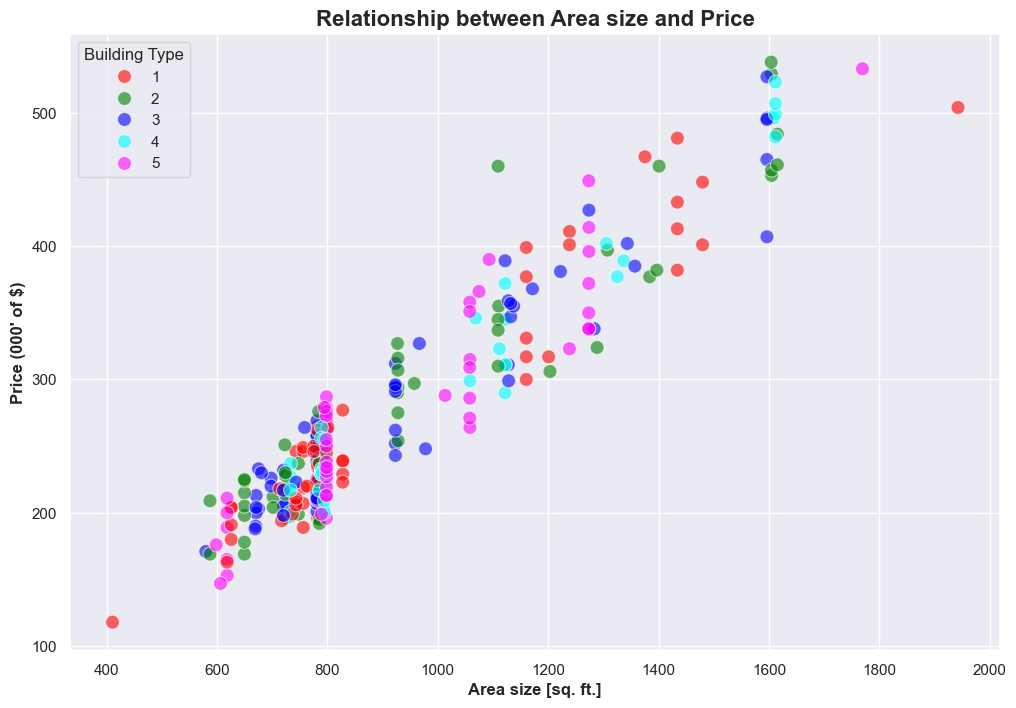

In [29]:
plt.figure(figsize=(12, 8))
building_t_clrs = ['red', 'green', 'blue', 'cyan', 'magenta']

sns.scatterplot(x=df_r_state_2['Area (ft.)'],       # x-axis (var 1)
                y=df_r_state_2['Price'],            # y-axis (var 2)
                alpha=0.6,                          # Transparency
                hue=df_r_state_2['Building Type'],  # Third var colored
                palette=building_t_clrs,            # Palette
                s=100)                              # Size of each point

plt.title('Relationship between Area size and Price',
          fontsize=16, fontweight='bold')
plt.xlabel('Area size [sq. ft.]', fontweight='bold')
plt.ylabel("Price (000' of $)", fontweight='bold')
plt.show()


### 8.- Scatter INTERPRETATION
- For each point in the scatter we can observe the values for both features.
- In the scatter-plot we were capable of plotting every obs. from our dataset (in the ex., based on its price and area). But mor importantly, we managed to show the relationship between our two numerical features.
- We observe that there is a positive co-linearity between size and price prop. (the larger the size, the higher the price).
- Don't forget thar there are other factors (ex. location). Therefore a single scatter-plot does not contain all the answers.
- The entire data set could be seen at once.
- OUTLIERS: we can easily spot when points are further away form the main groups as they don't share the same properties or don´t follows the general trend (we call such points outliers). A point that make us question the integrity of the data, is possible that either the price or the area of this property was entered incorrectly.

### 8.- Scatter - What Makes a Good Scatterplot
- Can display a large number of data points, but, everything has its limits.
- Over-plotting is a common mistake when it comes to scatterplots (ex. 95k data points)
- Some softs even has a built-in cap to prevent the plotting of excessively large datasets. You can add a transparency level to increase readability.
- In extreme case of over-plotting, transparency simpl isn't enough. Instead we could try to plot a subset of the entire data, process known as Sampling:
  - The sample should be random to avoid bias.
  - The sample should be representative of the pattern in the data
  - (we need s subset, which is small enough to avoid over-plotting, but large enough to contain the data pattern -ex. 300 obs.)
- Scatter plot can reveal relationships and patterns on the features (these an also be coincidental, but that's a topic for another time.)
- Scatter plots cannot explain the origin of the features' relationship (other 365 course?
- Other Chapters: we'll dive deeper into co-linearity and lear about trend-lines in scatter-plots).

## 9.- Combo Plots Part 1 - Regression Plot